# SVM code

##  Required Packages

In [3]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

from sklearn import svm 

## 1. Binary  Classification

#### Data

이번에 사용할 데이터는 svm 이론을 쉽게 이해하기 위해 sklearn 데이터셋에서 random으로 점을 찍어 임의로 예쁜 데이터를 만들어 사용할 것이다.

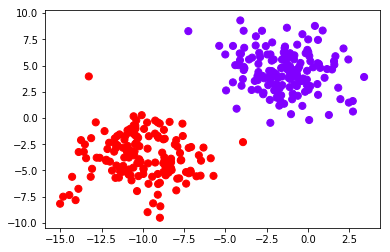

In [45]:
from sklearn.datasets import make_blobs


x, y = make_blobs(n_samples=300, centers=2,
                  random_state=1, cluster_std=2)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='rainbow')
plt.show()

#### Train set 과 Test set 나누기

In [46]:
x_train, x_test, y_train, y_test= train_test_split(x,y,random_state=0)

#### 모델 만들기

In [47]:
svm_linear=svm.SVC(C=1000, kernel='linear').fit(x_train,y_train)

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

위의 사이트는 scikit-learn 홈페이지에서 svm 함수를 설명하는 부분이다.

SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)[source]

아직 커널과 soft SVM을 안배워서 tol, max_iter 정도만 알면 된다.

#### 결과확인

In [5]:
svm_linear.support_                # support vector의 index들

array([ 47, 133, 177])

In [6]:
svm_linear.support_vectors_        # support vectors

array([[ -4.32346324,   0.88511275],
       [-13.27261169,   3.96385686],
       [ -3.93599828,  -2.3041793 ]])

In [7]:
svm_linear.n_support_              # 각 클레스에 속한 support vectors 수

array([1, 2])

In [8]:
svm_linear.predict(x_test)         # 새로운 데이터 예측

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0])

In [9]:
svm_linear.score(x_test,y_test)    #모델 정확도

1.0

In [10]:
svm_linear.coef_

array([[-0.45821289, -0.68253546]])

In [11]:
svm_linear.intercept_

array([-2.37645474])

In [13]:
soft_svm_linear.score(x_test,y_test) 

1.0

#### 모델 확인

In [48]:

w_1=svm_linear.coef_[0][0]
w_2=svm_linear.coef_[0][1]
b=svm_linear.intercept_
xx=np.linspace(-15,2.5,10)

f=(-b-w_1*xx)/w_2       # w_1*x1-+w2*x2+b=0  
f_1=(-b-1-w_1*xx)/w_2   # w_1*x1-+w2*x2+b=-1  
f_2=(-b+1-w_1*xx)/w_2   # w_1*x1-+w2*x2+b=1


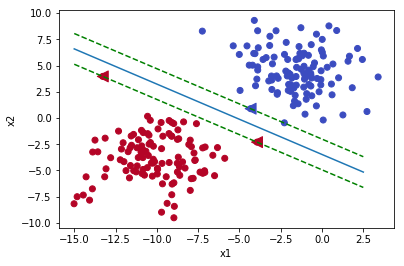

In [49]:

#그레프 그리기
plt.scatter(x_train[:,0],x_train[:,1] ,c=y_train, cmap=plt.cm.coolwarm)

plt.scatter(svm_linear.support_vectors_[:,0],svm_linear.support_vectors_[:,1],s=120, marker='<',c=y_train[svm_linear.support_], cmap=plt.cm.coolwarm)
#plt.scatter(x_test[:,0],x_test[:,1],c=y_test, marker=">", cmap=plt.cm.coolwarm)

plt.plot(xx,f)
plt.plot(xx,f_1,ls='dashed', c='g')
plt.plot(xx,f_2, ls='dashed', c='g')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

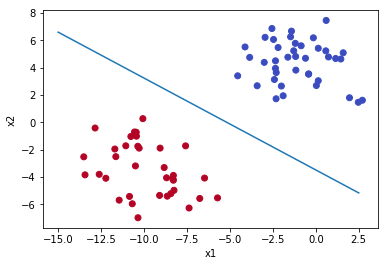

In [50]:
#테스트 데이터에 대해 그레프 그리기
plt.scatter(x_test[:,0],x_test[:,1] ,c=y_test, cmap=plt.cm.coolwarm)

plt.plot(xx,f)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## 2. Soft SVM

### Data

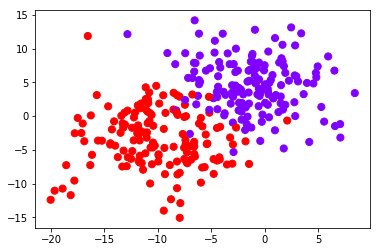

In [52]:
from sklearn.datasets import make_blobs


x, y = make_blobs(n_samples=300, centers=2,
                  random_state=1, cluster_std=4)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='rainbow')
plt.show()

#### Train set 과 Test set 나누기

In [53]:
x_train, x_test, y_train, y_test= train_test_split(x,y,random_state=0)

### 모델만들기

앞에서 배운 내용을 다시 보자면 Soft SVM에서 상수 C는 오차정도를 마진의 크기를 조절하는 역할의 초매개변수라고 하였다.

이번 코드에서는 C를 조절하여 앞에서 배운 내용이 맞는지 확인해보자

먼저 C를 매우 크게 잡아 hard SVM 처럼 오차를 최대한 줄인 모델을 만들어 보자

In [17]:
soft_svm_linear=svm.SVC(C=1000, kernel='linear').fit(x_train,y_train)

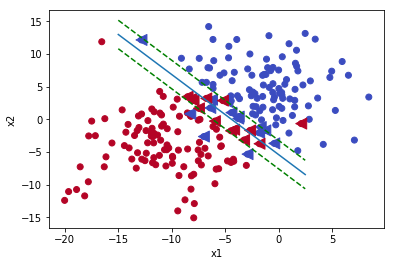

In [32]:

w_1=soft_svm_linear.coef_[0][0]
w_2=soft_svm_linear.coef_[0][1]
b=soft_svm_linear.intercept_
xx=np.linspace(-15,2.5,10)

f=(-b-w_1*xx)/w_2       # w_1*x1-+w2*x2+b=0  
f_1=(-b-1-w_1*xx)/w_2   # w_1*x1-+w2*x2+b=-1  
f_2=(-b+1-w_1*xx)/w_2   # w_1*x1-+w2*x2+b=1

#그레프 그리기
plt.scatter(x_train[:,0],x_train[:,1] ,c=y_train, cmap=plt.cm.coolwarm)

plt.scatter(soft_svm_linear.support_vectors_[:,0],soft_svm_linear.support_vectors_[:,1],s=120, marker='<',c=y_train[soft_svm_linear.support_], cmap=plt.cm.coolwarm)
#plt.scatter(x_test[:,0],x_test[:,1],c=y_test, marker=">", cmap=plt.cm.coolwarm)

plt.plot(xx,f)
plt.plot(xx,f_1,ls='dashed', c='g')
plt.plot(xx,f_2, ls='dashed', c='g')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


In [20]:
soft_svm_linear.score(x_test,y_test) 

0.97333333333333338

이번에는 C를 작게해보자.

In [54]:
soft_svm_linear=svm.SVC(C=0.01, kernel='linear').fit(x_train,y_train)

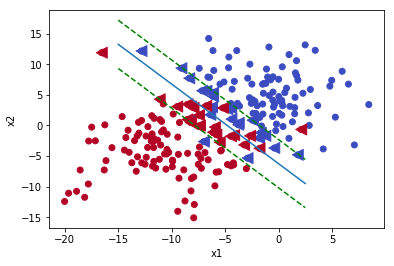

In [55]:

w_1=soft_svm_linear.coef_[0][0]
w_2=soft_svm_linear.coef_[0][1]
b=soft_svm_linear.intercept_
xx=np.linspace(-15,2.5,10)

f=(-b-w_1*xx)/w_2       # w_1*x1-+w2*x2+b=0  
f_1=(-b-1-w_1*xx)/w_2   # w_1*x1-+w2*x2+b=-1  
f_2=(-b+1-w_1*xx)/w_2   # w_1*x1-+w2*x2+b=1

#그레프 그리기
plt.scatter(x_train[:,0],x_train[:,1] ,c=y_train, cmap=plt.cm.coolwarm)

plt.scatter(soft_svm_linear.support_vectors_[:,0],soft_svm_linear.support_vectors_[:,1],s=120, marker='<',c=y_train[soft_svm_linear.support_], cmap=plt.cm.coolwarm)
#plt.scatter(x_test[:,0],x_test[:,1],c=y_test, marker=">", cmap=plt.cm.coolwarm)

plt.plot(xx,f)
plt.plot(xx,f_1,ls='dashed', c='g')
plt.plot(xx,f_2, ls='dashed', c='g')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


##  3. Kernels

#### Data

이번 데이터는 선형으로 분리 불가능한 데이터를 가져와서 커널을 이용하여 분리한다.

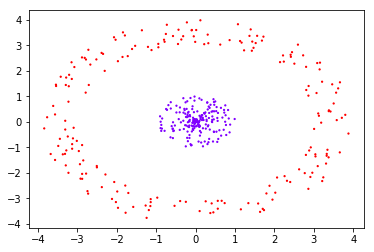

In [71]:
import random

r_1=[]
r_2=[]
t_1=[]
t_2=[]
y_1=[]
y_2=[]

for i in range(200):
    r_1.append(random.uniform(0,1))
    r_2.append(random.uniform(3,4))
    y_1.append(0)
    t_1.append(random.uniform(0,2*np.pi))
    t_2.append(random.uniform(0,2*np.pi))
    y_2.append(1)



X11=r_1*np.cos(t_1)
X12=r_1*np.sin(t_1)
X21=r_2*np.cos(t_2)
X22=r_2*np.sin(t_2)

X11=np.reshape(X11,[-1,1])
X12=np.reshape(X12,[-1,1])
X21=np.reshape(X21,[-1,1])
X22=np.reshape(X22,[-1,1])


X1=np.concatenate((X11,X12),axis=1)
X2=np.concatenate((X21,X22),axis=1)
X=np.concatenate((X1,X2),axis=0)
y=np.concatenate((y_1,y_2))
xx=np.linspace(-4,4)
plt.scatter(X[:,0],X[:,1], s=1.5 ,c=y, cmap='rainbow')
plt.show()



#### Train set 과 Test set 나누기

In [72]:
x_train, x_test, y_train, y_test= train_test_split(X,y,random_state=0)

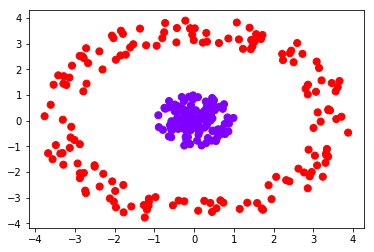

In [74]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=50, cmap='rainbow')
plt.show()

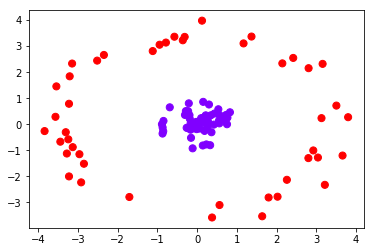

In [75]:
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=50, cmap='rainbow')
plt.show()

#### 모델 만들기

먼저 linear kernel을 이용하여 정확도를 확인해보자

In [76]:
svm_linear=svm.SVC(C=1000, kernel='linear').fit(x_train,y_train)

In [77]:
svm_linear.score(x_test,y_test)

0.45000000000000001

정확도가 54%로 그다지 높지 않다. 다음으로는 Polynomial, Gaussian Kernel을 이용해서 분류해보자.

In [79]:
svm_poly=svm.SVC(C=1000, kernel='poly').fit(x_train,y_train)

In [81]:
svm_poly.score(x_test,y_test)

0.70999999999999996

In [82]:
svm_rbf=svm.SVC(C=1, kernel='rbf').fit(x_train,y_train)

In [83]:
svm_rbf.score(x_test,y_test)

1.0

# Multiclass SVMs

Multiclass SVMs에서는 다음의 데이터를 사용한다.

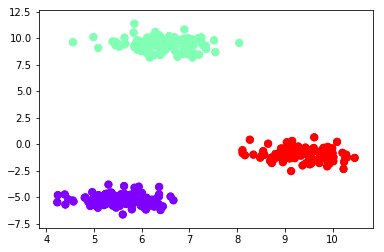

In [59]:
X, y = make_blobs(n_samples=300, centers=3,
                  random_state=13, cluster_std=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plt.show()

## One vs Rest(OVR)

먼저 OVR 방법을 이용하여 Multiclass를 분류해 보자.

지금까지 사용한 svm.SVC 모듈은 OVR 방법을 지원하지 않는다. 그래서 같은 역할을 하는 모듈 svm.LinearSVC를 이용하자.

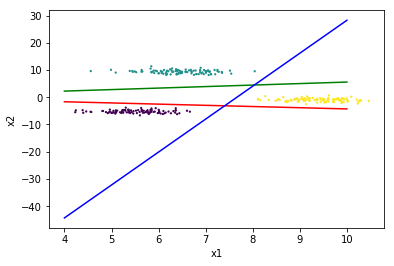

In [60]:
linear_svm=svm.LinearSVC(C=1000, multi_class='ovr').fit(X,y)

w_11=linear_svm.coef_[0][0]
w_12=linear_svm.coef_[0][1]
b_1=linear_svm.intercept_[0]


w_21=linear_svm.coef_[1][0]
w_22=linear_svm.coef_[1][1]
b_2=linear_svm.intercept_[1]


w_31=linear_svm.coef_[2][0]
w_32=linear_svm.coef_[2][1]
b_3=linear_svm.intercept_[2]
 


#그레프 그리기
xx=np.linspace(4,10,10)

f_1=(-b_1-w_11*xx)/w_12   
f_2=(-b_2-w_21*xx)/w_22   
f_3=(-b_3-w_31*xx)/w_32  

plt.scatter(X[:,0],X[:,1], s=1.5 ,c=y)


plt.plot(xx,f_1, c='r')
plt.plot(xx,f_2, c='g')
plt.plot(xx,f_3, c='b')
#plt.fill_between(xx,f_1,f_2, color='grey', alpha='0.5')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


In [63]:
linear_svm.score(x_test,y_test)

0.093333333333333338

## One vs One

다음으로 One vs One 방법으로 분류해보자. svm.svc에서는 ovo를 디폴트 값으로 설정되어있다.

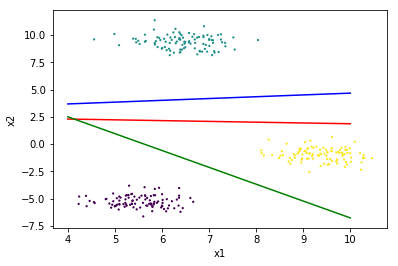

In [67]:
svm_linear=svm.SVC(C=1000, kernel='linear').fit(X,y)

w_11=svm_linear.coef_[0][0]
w_12=svm_linear.coef_[0][1]
b_1=svm_linear.intercept_[0]


w_21=svm_linear.coef_[1][0]
w_22=svm_linear.coef_[1][1]
b_2=svm_linear.intercept_[1]


w_31=svm_linear.coef_[2][0]
w_32=svm_linear.coef_[2][1]
b_3=svm_linear.intercept_[2]
 


#그레프 그리기
xx=np.linspace(4,10,10)

f_1=(-b_1-w_11*xx)/w_12   
f_2=(-b_2-w_21*xx)/w_22   
f_3=(-b_3-w_31*xx)/w_32  

plt.scatter(X[:,0],X[:,1], s=1.5 ,c=y)


plt.plot(xx,f_1, c='r')
plt.plot(xx,f_2, c='g')
plt.plot(xx,f_3, c='b')
#plt.fill_between(xx,f_1,f_2, color='grey', alpha='0.5')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


In [68]:
linear_svm.score(x_test,y_test)

0.093333333333333338